# **Exploratory** **Data** **Analysis**
Balanced Labels: No significant bias among Contradiction (34.46%), Entailment (33.53%), and Neutral (32.01%).

Language Imbalance: English (56.68%) dominates, requiring special handling for minority languages.

Sentence Length Difference: Premises (approx. 18 words) are consistently longer than Hypotheses (approx. 9 words).

Skewed Length Distribution: Majority of sentences fall within 5-25 words, with fewer long sentences.

Loading dataset from: /content/train.csv
Dataset Loaded Successfully!
No missing values found in the dataset.

Analyzing label distribution...


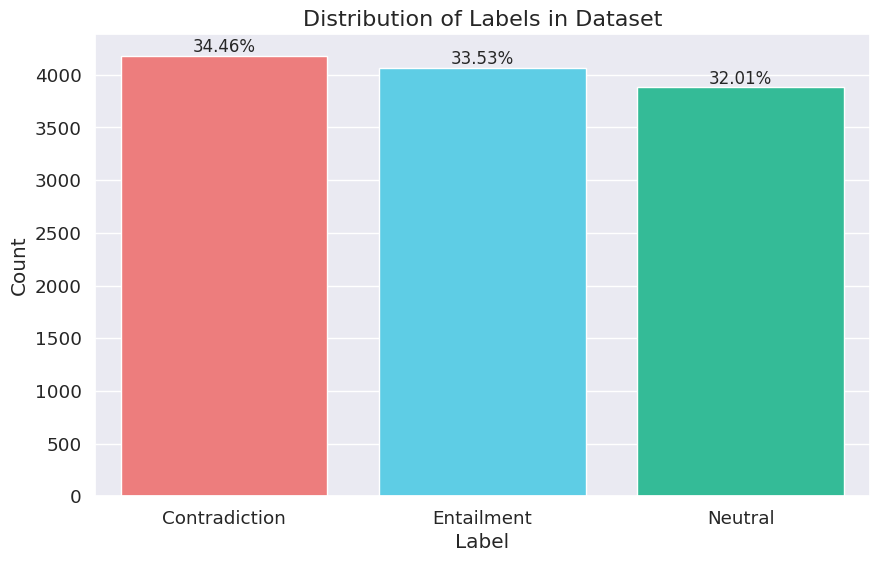


Analyzing language distribution...


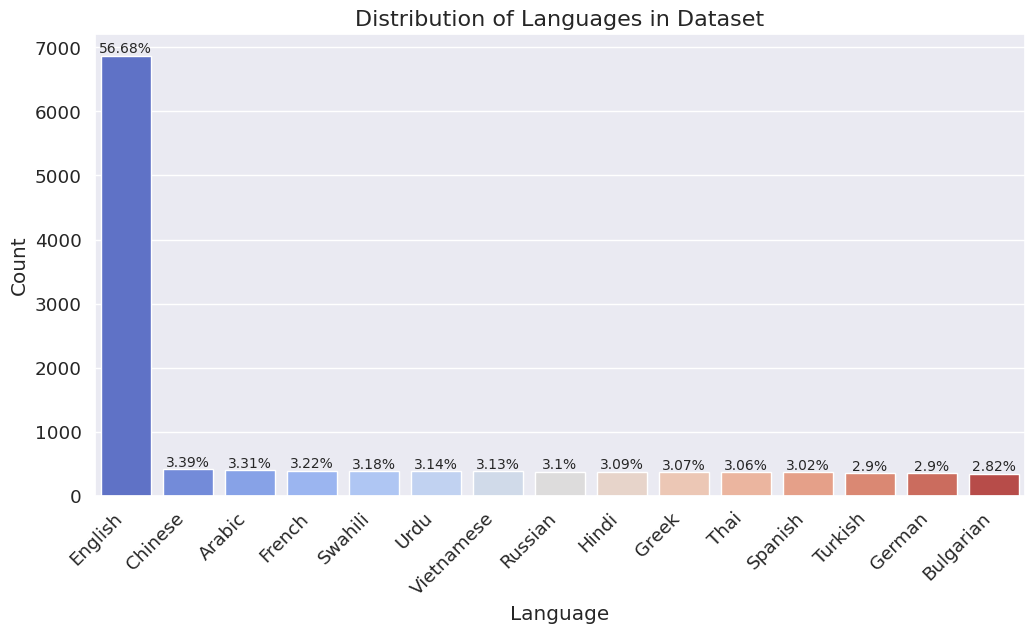


Analyzing sentence length distribution...


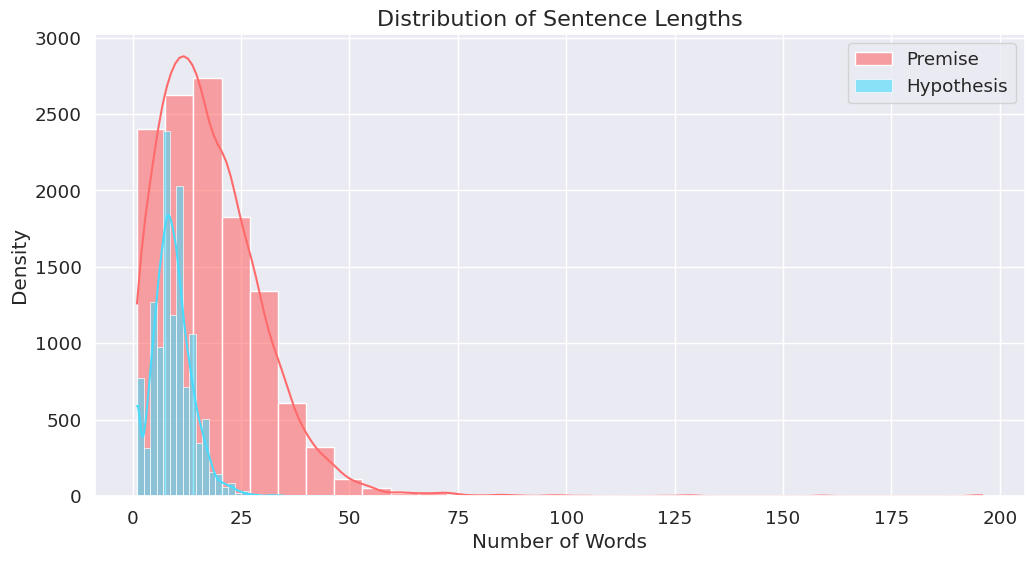


Analyzing sentence lengths by label...


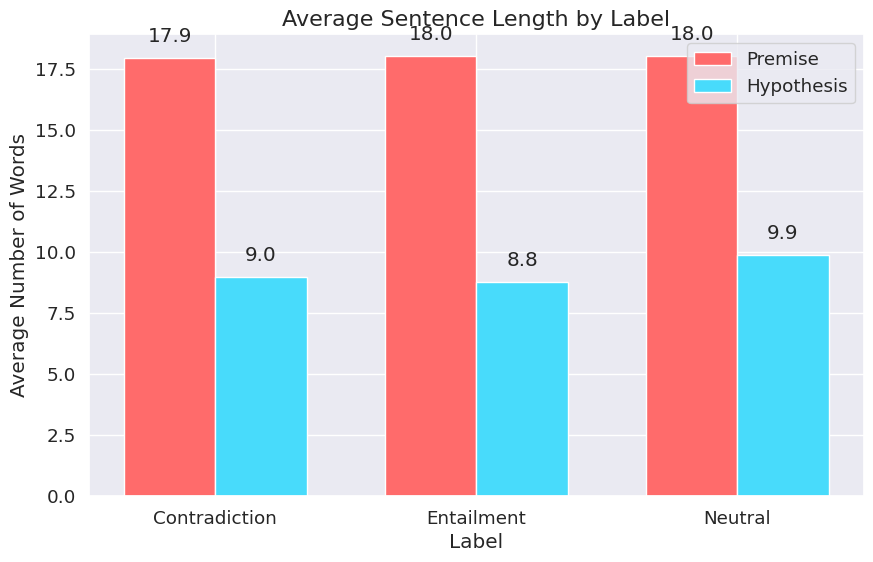


Analyzing common words in premises...


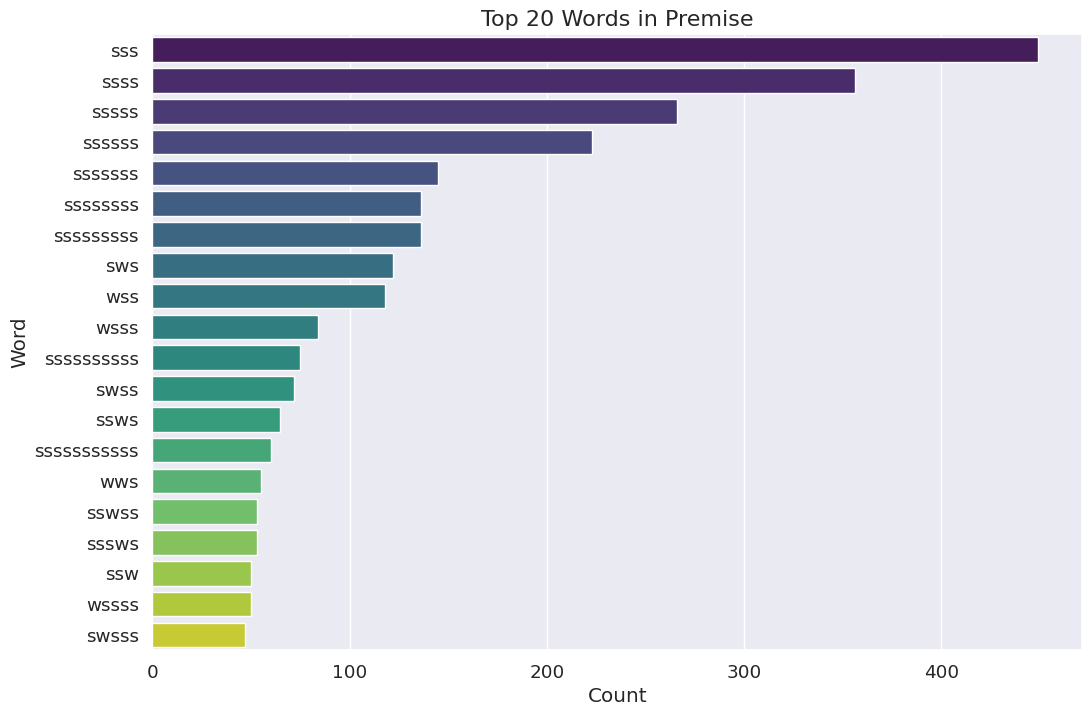


Analyzing common words in hypotheses...


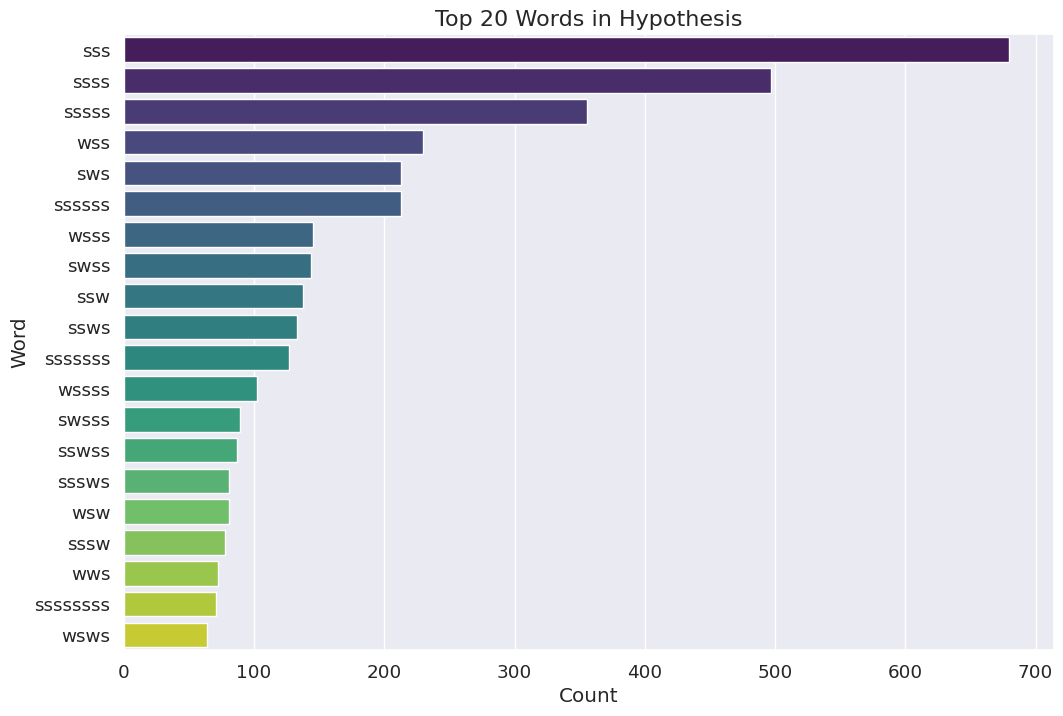

Exploratory Data Analysis Completed!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# Set plot aesthetics
plt.style.use('ggplot')
sns.set(font_scale=1.2)
colors = ['#ff6b6b', '#48dbfb', '#1dd1a1']

# Load dataset globally so it can be accessed by all functions
dataset_path = "/content/train.csv"
print(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)
print("Dataset Loaded Successfully!")

# Function to check for missing values
def check_missing_values():
    """Check if there are missing values in the dataset and print a message accordingly."""
    missing = df.isnull().sum().sum()
    if missing == 0:
        print("No missing values found in the dataset.")
    else:
        print("Missing values detected in the dataset.")

# Function to plot the label distribution
def plot_label_distribution():
    """Visualize the distribution of labels in the dataset."""
    label_mapping = {0: 'Contradiction', 1: 'Neutral', 2: 'Entailment'}
    df['label_name'] = df['label'].map(label_mapping)

    label_counts = df['label_name'].value_counts().reset_index()
    label_counts.columns = ['Label', 'Count']
    label_counts['Percentage'] = (label_counts['Count'] / len(df) * 100).round(2)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Label', y='Count', data=label_counts, palette=colors)

    for i, p in enumerate(ax.patches):
        ax.annotate(f"{label_counts['Percentage'].iloc[i]}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

    plt.title('Distribution of Labels in Dataset', fontsize=16)
    plt.show()

# Function to plot the language distribution
def plot_language_distribution():
    """Plot the distribution of languages in the dataset."""
    if 'language' not in df.columns:
        print("No 'language' column found in the dataset.")
        return None

    lang_counts = df['language'].value_counts().reset_index()
    lang_counts.columns = ['Language', 'Count']
    lang_counts['Percentage'] = (lang_counts['Count'] / len(df) * 100).round(2)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Language', y='Count', data=lang_counts, palette="coolwarm")
    plt.xticks(rotation=45, ha='right')

    for i, p in enumerate(ax.patches):
        ax.annotate(f"{lang_counts['Percentage'].iloc[i]}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

    plt.title('Distribution of Languages in Dataset', fontsize=16)
    plt.xlabel("Language")
    plt.ylabel("Count")
    plt.show()

# Function to analyze sentence lengths
def sentence_length_analysis():
    """Analyze and plot the length distribution of sentences."""
    df['premise_length'] = df['premise'].str.split().str.len()
    df['hypothesis_length'] = df['hypothesis'].str.split().str.len()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['premise_length'], kde=True, color=colors[0], label='Premise', bins=30, alpha=0.6)
    sns.histplot(df['hypothesis_length'], kde=True, color=colors[1], label='Hypothesis', bins=30, alpha=0.6)

    plt.title('Distribution of Sentence Lengths', fontsize=16)
    plt.xlabel('Number of Words')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Function to analyze sentence length by label
def sentence_length_by_label():
    """Analyze and plot sentence length by label."""
    label_mapping = {0: 'Contradiction', 1: 'Neutral', 2: 'Entailment'}
    df['label_name'] = df['label'].map(label_mapping)

    avg_lengths = df.groupby('label_name')[['premise_length', 'hypothesis_length']].mean().reset_index()

    plt.figure(figsize=(10, 6))
    x = np.arange(len(avg_lengths))
    width = 0.35

    plt.bar(x - width/2, avg_lengths['premise_length'], width, label='Premise', color=colors[0])
    plt.bar(x + width/2, avg_lengths['hypothesis_length'], width, label='Hypothesis', color=colors[1])

    plt.xlabel('Label')
    plt.ylabel('Average Number of Words')
    plt.title('Average Sentence Length by Label', fontsize=16)
    plt.xticks(x, avg_lengths['label_name'])
    plt.legend()

    for i, v in enumerate(avg_lengths['premise_length']):
        plt.text(i - width/2, v + 0.5, f"{v:.1f}", ha='center', va='bottom')

    for i, v in enumerate(avg_lengths['hypothesis_length']):
        plt.text(i + width/2, v + 0.5, f"{v:.1f}", ha='center', va='bottom')

    plt.show()

# Function to analyze most common words
def analyze_common_words(top_n=20, column='premise'):
    """Analyze and plot most common words in the specified column."""
    stop_words = {'the', 'and', 'a', 'to', 'of', 'in', 'is', 'that', 'it', 'for', 'on', 'with', 'be', 'as', 'by', 'an', 'at'}
    all_words = []

    for text in df[column].dropna():
        words = re.sub(r'[^\\w\\s]', '', str(text).lower()).split()
        all_words.extend([word for word in words if word not in stop_words and len(word) > 2])

    word_counts = Counter(all_words).most_common(top_n)
    word_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Word', data=word_df, palette='viridis')
    plt.title(f'Top {top_n} Words in {column.capitalize()}', fontsize=16)
    plt.show()

# Function to execute full EDA
def run_eda():
    """Execute and display the full EDA process using the globally loaded dataset."""
    check_missing_values()

    print("\nAnalyzing label distribution...")
    plot_label_distribution()

    print("\nAnalyzing language distribution...")
    plot_language_distribution()

    print("\nAnalyzing sentence length distribution...")
    sentence_length_analysis()

    print("\nAnalyzing sentence lengths by label...")
    sentence_length_by_label()

    print("\nAnalyzing common words in premises...")
    analyze_common_words(top_n=20, column='premise')

    print("\nAnalyzing common words in hypotheses...")
    analyze_common_words(top_n=20, column='hypothesis')

    print("Exploratory Data Analysis Completed!")

# Run the EDA process
run_eda()


In [2]:
import nltk

# Manually download missing NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("  NLTK Resources Downloaded!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


  NLTK Resources Downloaded!


[nltk_data]   Package omw-1.4 is already up-to-date!


# **Lower** **Casing** **and** **Tokenization**

In [3]:
import re

# Import tokenizers from NLTK
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Define a fallback tokenizer in case the primary one fails
fallback_tokenizer = TreebankWordTokenizer()

def tokenize_and_lowercase(text):
    """
    Tokenizes and converts text to lowercase with error handling.

    Steps:
    - Checks if input is a valid string (handles potential NaN or None values).
    - Converts text to lowercase for uniformity.
    - Attempts tokenization using NLTK's `word_tokenize()`.
    - If tokenization fails due to missing resources, it falls back to `TreebankWordTokenizer()`.

    Parameters:
    text (str): Input text to be tokenized.

    Returns:
    list: A list of tokenized words in lowercase.
    """
    if not isinstance(text, str) or not text.strip():  # Ensure valid non-empty text
        return []  # Return an empty list for invalid inputs

    text = text.lower()  # Convert to lowercase for consistency

    try:
        tokens = word_tokenize(text)  # Primary tokenization method
    except LookupError:
        tokens = fallback_tokenizer.tokenize(text)  # Fallback tokenizer

    return tokens

# Apply tokenization & lowercasing to the dataset
df['tokenized_premise'] = df['premise'].apply(tokenize_and_lowercase)
df['tokenized_hypothesis'] = df['hypothesis'].apply(tokenize_and_lowercase)

# Display confirmation and preview results
print("Tokenization & Lowercasing Completed Successfully!")
print(df[['premise', 'tokenized_premise']].head(3))  # Display first 3 rows to verify tokenization


Tokenization & Lowercasing Completed Successfully!
                                             premise  \
0  and these comments were considered in formulat...   
1  These are issues that we wrestle with in pract...   
2  Des petites choses comme celles-là font une di...   

                                   tokenized_premise  
0  [and, these, comments, were, considered, in, f...  
1  [these, are, issues, that, we, wrestle, with, ...  
2  [des, petites, choses, comme, celles-là, font,...  


In [6]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=c3bd2f54bd9d69a07e4f3edb0a8865f6cf71dd47bfd0fcbd1a4c35ad00f905ec
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


# **Stop** **Words**

In [4]:
import string
from langdetect import detect
from nltk.corpus import stopwords

# Load supported stopword languages from NLTK
available_languages = stopwords.fileids()

def detect_language(text):
    """
    Detects the language of a given text using `langdetect`.

    Parameters:
    - text (str): Input text.

    Returns:
    - str: Detected language code (e.g., 'en', 'fr', 'ar') or 'unknown' if detection fails.
    """
    try:
        return detect(text)
    except:
        return "unknown"  # Return 'unknown' if detection fails

def get_stopwords_for_language(lang_code):
    """
    Fetches stopwords for a detected language if available in NLTK.

    Parameters:
    - lang_code (str): Language code detected.

    Returns:
    - set: Stopword set for the language (or an empty set if not available).
    """
    if lang_code in available_languages:
        return set(stopwords.words(lang_code))  # Load stopwords for the detected language
    return set()  # Return an empty set if stopwords for the language are not available

def clean_tokens(tokens, lang_code):
    """
    Removes stopwords based on detected language and filters punctuation.

    Parameters:
    - tokens (list): Tokenized words.
    - lang_code (str): Detected language code.

    Returns:
    - list: List of cleaned tokens
    """
    stop_words = get_stopwords_for_language(lang_code)

    # Remove stopwords while keeping negations
    cleaned_tokens = [
        word for word in tokens if word not in stop_words or word in {"not", "no", "n't"}
    ]

    # Remove punctuation
    cleaned_tokens = [word for word in cleaned_tokens if word not in string.punctuation]

    return cleaned_tokens

# Detect language only once
df['premise_lang'] = df['premise'].apply(detect_language)
df['hypothesis_lang'] = df['hypothesis'].apply(detect_language)

# Apply stopword & punctuation removal
df['clean_premise'] = df.apply(lambda x: clean_tokens(x['tokenized_premise'], x['premise_lang']), axis=1)
df['clean_hypothesis'] = df.apply(lambda x: clean_tokens(x['tokenized_hypothesis'], x['hypothesis_lang']), axis=1)

# Display confirmation and preview results
print("Multi-Language Stopword Removal Completed Successfully!")
print(df[['tokenized_premise', 'clean_premise']].head(10))  # Preview first 10 rows


Multi-Language Stopword Removal Completed Successfully!
                                   tokenized_premise  \
0  [and, these, comments, were, considered, in, f...   
1  [these, are, issues, that, we, wrestle, with, ...   
2  [des, petites, choses, comme, celles-là, font,...   
3  [you, know, they, ca, n't, really, defend, the...   
4  [ในการเล่นบทบาทสมมุติก็เช่นกัน, โอกาสที่จะได้แ...   
5  [bir, çiftlikte, birisinin, ,, ağıla, kapatılm...   
6  [ریاست, ہائے, متحدہ, امریکہ, واپس, آنے, پر،, ہ...   
7    [from, cockpit, country, to, st., ann, 's, bay]   
8  [look, ,, it, 's, your, skin, ,, but, you, 're...   
9  [через, каждые, сто, градусов, пятна, краски, ...   

                                       clean_premise  
0  [and, these, comments, were, considered, in, f...  
1  [these, are, issues, that, we, wrestle, with, ...  
2  [des, petites, choses, comme, celles-là, font,...  
3  [you, know, they, ca, n't, really, defend, the...  
4  [ในการเล่นบทบาทสมมุติก็เช่นกัน, โอกาสที่จะได้แ...

# **Lemmitization**

In [14]:
pip install jieba


In [16]:
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 36.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Lemmitization According to language variation**

In [7]:
import spacy
import jieba
from nltk.stem import WordNetLemmatizer

# Initialize the English lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Load spaCy models for supported languages
# You may need to install these using `!python -m spacy download {model_name}`
spacy_models = {
    "French": spacy.load("fr_core_news_sm"),
}

def lemmatize_text(tokens, lang):
    """
    Applies language-specific lemmatization.

    Parameters:
    - tokens (list): List of tokenized words.
    - lang (str): Language name from the dataset.

    Returns:
    - list: List of lemmatized words.
    """
    if not isinstance(tokens, list) or not tokens:  # Ensure valid input
        return []

    # Apply English lemmatization
    if lang == "English":
        return [wordnet_lemmatizer.lemmatize(word) for word in tokens]

    # Apply French lemmatization using spaCy
    elif lang == "French":
        nlp = spacy_models["French"]
        text = " ".join(tokens)  # Convert tokens to a string
        return [token.lemma_ for token in nlp(text)]

    # Apply Chinese tokenization using Jieba (no real lemmatization)
    elif lang == "Chinese":
        return list(jieba.cut(" ".join(tokens)))  # Tokenize text

    # For Arabic & Swahili, keep words unchanged (no effective lemmatizer available)
    return tokens

# Apply multi-language lemmatization
df['lemmatized_premise'] = df.apply(lambda x: lemmatize_text(x['clean_premise'], x['language']), axis=1)
df['lemmatized_hypothesis'] = df.apply(lambda x: lemmatize_text(x['clean_hypothesis'], x['language']), axis=1)

# Display confirmation and preview results
print("Multi-Language Lemmatization Completed Successfully!")
print(df[['clean_premise', 'lemmatized_premise']].head(10))  # Preview first 10 rows


Multi-Language Lemmatization Completed Successfully!
                                       clean_premise  \
0  [and, these, comments, were, considered, in, f...   
1  [these, are, issues, that, we, wrestle, with, ...   
2  [des, petites, choses, comme, celles-là, font,...   
3  [you, know, they, ca, n't, really, defend, the...   
4  [ในการเล่นบทบาทสมมุติก็เช่นกัน, โอกาสที่จะได้แ...   
5  [bir, çiftlikte, birisinin, ağıla, kapatılmış,...   
6  [ریاست, ہائے, متحدہ, امریکہ, واپس, آنے, پر،, ہ...   
7    [from, cockpit, country, to, st., ann, 's, bay]   
8  [look, it, 's, your, skin, but, you, 're, goin...   
9  [через, каждые, сто, градусов, пятна, краски, ...   

                                  lemmatized_premise  
0  [and, these, comment, were, considered, in, fo...  
1  [these, are, issue, that, we, wrestle, with, i...  
2  [un, petit, chose, comme, celui, -là, faire, u...  
3  [you, know, they, ca, n't, really, defend, the...  
4  [ในการเล่นบทบาทสมมุติก็เช่นกัน, โอกาสที่จะได้แ...  


# **Vectorization**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Dictionary to store TF-IDF features per language
tfidf_features = {}

# Process TF-IDF separately for each language
for lang in df['language'].unique():
    """
    Since our dataset contains multiple languages, we process TF-IDF separately for each language.
    This prevents the model from treating words in different languages as the same feature.
    """

    # Filter dataset for the current language
    df_lang = df[df['language'] == lang].copy()

    # Convert lemmatized tokens back into text format for TF-IDF processing
    df_lang['text_premise'] = df_lang['lemmatized_premise'].apply(lambda x: " ".join(x))
    df_lang['text_hypothesis'] = df_lang['lemmatized_hypothesis'].apply(lambda x: " ".join(x))

    # Initialize TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)

    # Fit and transform the premise text
    tfidf_premise = tfidf_vectorizer.fit_transform(df_lang['text_premise']).toarray()

    # Transform the hypothesis text using the same vectorizer (to ensure consistency)
    tfidf_hypothesis = tfidf_vectorizer.transform(df_lang['text_hypothesis']).toarray()

    # Store extracted TF-IDF features per language
    tfidf_features[lang] = {
        'premise': tfidf_premise,  # TF-IDF features for premise text
        'hypothesis': tfidf_hypothesis,  # TF-IDF features for hypothesis text
        'labels': df_lang['label'].values  # Corresponding labels
    }

    # Print confirmation message
    print(f"TF-IDF Extraction Completed for {lang} ({df_lang.shape[0]} samples)")


TF-IDF Extraction Completed for English (6870 samples)
TF-IDF Extraction Completed for French (390 samples)
TF-IDF Extraction Completed for Thai (371 samples)
TF-IDF Extraction Completed for Turkish (351 samples)
TF-IDF Extraction Completed for Urdu (381 samples)
TF-IDF Extraction Completed for Russian (376 samples)
TF-IDF Extraction Completed for Bulgarian (342 samples)
TF-IDF Extraction Completed for German (351 samples)
TF-IDF Extraction Completed for Arabic (401 samples)
TF-IDF Extraction Completed for Chinese (411 samples)
TF-IDF Extraction Completed for Hindi (374 samples)
TF-IDF Extraction Completed for Swahili (385 samples)
TF-IDF Extraction Completed for Vietnamese (379 samples)
TF-IDF Extraction Completed for Spanish (366 samples)
TF-IDF Extraction Completed for Greek (372 samples)


In [9]:
print("Keys in tfidf_features:", tfidf_features.keys())

for lang, features in tfidf_features.items():
    print(f"\nLanguage: {lang}")
    print(f"Premise Shape: {features['premise'].shape}")
    print(f"Hypothesis Shape: {features['hypothesis'].shape}")
    print(f"Labels Shape: {features['labels'].shape}")


Keys in tfidf_features: dict_keys(['English', 'French', 'Thai', 'Turkish', 'Urdu', 'Russian', 'Bulgarian', 'German', 'Arabic', 'Chinese', 'Hindi', 'Swahili', 'Vietnamese', 'Spanish', 'Greek'])

Language: English
Premise Shape: (6870, 5000)
Hypothesis Shape: (6870, 5000)
Labels Shape: (6870,)

Language: French
Premise Shape: (390, 2207)
Hypothesis Shape: (390, 2207)
Labels Shape: (390,)

Language: Thai
Premise Shape: (371, 3393)
Hypothesis Shape: (371, 3393)
Labels Shape: (371,)

Language: Turkish
Premise Shape: (351, 2933)
Hypothesis Shape: (351, 2933)
Labels Shape: (351,)

Language: Urdu
Premise Shape: (381, 2434)
Hypothesis Shape: (381, 2434)
Labels Shape: (381,)

Language: Russian
Premise Shape: (376, 3052)
Hypothesis Shape: (376, 3052)
Labels Shape: (376,)

Language: Bulgarian
Premise Shape: (342, 2694)
Hypothesis Shape: (342, 2694)
Labels Shape: (342,)

Language: German
Premise Shape: (351, 2482)
Hypothesis Shape: (351, 2482)
Labels Shape: (351,)

Language: Arabic
Premise Shape: (

In [10]:
from gensim.models import Word2Vec

# Dictionary to store trained Word2Vec models per language
word2vec_models = {}

# Train Word2Vec separately for each language
for lang in df['language'].unique():
    """
    Since our dataset contains multiple languages, we train separate Word2Vec models per language.
    This prevents the model from mixing different linguistic structures and word relationships.
    """

    # Filter dataset for the current language
    df_lang = df[df['language'] == lang].copy()

    # Convert lemmatized token lists back into strings
    df_lang['lemmatized_premise'] = df_lang['lemmatized_premise'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
    df_lang['lemmatized_hypothesis'] = df_lang['lemmatized_hypothesis'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

    # Tokenize sentences into lists of words for Word2Vec training
    tokenized_text = (
        df_lang['lemmatized_premise'].apply(lambda x: str(x).split()).tolist() +
        df_lang['lemmatized_hypothesis'].apply(lambda x: str(x).split()).tolist()
    )

    # Train Word2Vec model on the tokenized text
    word2vec_model = Word2Vec(
        sentences=tokenized_text,  # Input tokenized sentences
        vector_size=100,  # Size of word embeddings
        window=5,  # Context window size for words
        min_count=2,  # Ignore words that appear less than 2 times
        workers=4,  # Number of CPU cores for parallel training
        sg=1  # Use skip-gram (better for smaller datasets)
    )

    # Store trained Word2Vec model per language
    word2vec_models[lang] = word2vec_model

    # Print confirmation message
    print(f"Word2Vec Model Trained for {lang} ({df_lang.shape[0]} samples)")


Word2Vec Model Trained for English (6870 samples)
Word2Vec Model Trained for French (390 samples)
Word2Vec Model Trained for Thai (371 samples)
Word2Vec Model Trained for Turkish (351 samples)
Word2Vec Model Trained for Urdu (381 samples)
Word2Vec Model Trained for Russian (376 samples)
Word2Vec Model Trained for Bulgarian (342 samples)
Word2Vec Model Trained for German (351 samples)
Word2Vec Model Trained for Arabic (401 samples)
Word2Vec Model Trained for Chinese (411 samples)
Word2Vec Model Trained for Hindi (374 samples)
Word2Vec Model Trained for Swahili (385 samples)
Word2Vec Model Trained for Vietnamese (379 samples)
Word2Vec Model Trained for Spanish (366 samples)
Word2Vec Model Trained for Greek (372 samples)


In [11]:
print("\nChecking Word2Vec Model Training:\n")

# Iterate through each trained Word2Vec model per language
for lang, model in word2vec_models.items():
    """
    This loop verifies:
    1. Whether the model has been trained correctly for each language.
    2. The vocabulary size to ensure words were learned.
    3. Sample word embeddings and their most similar words.
    """

    # Get the vocabulary size
    vocab_size = len(model.wv)

    # Print basic model details
    print(f"{lang} → Vocabulary Size: {vocab_size}")

    # Check if the model has learned any word embeddings
    if vocab_size > 0:
        # Pick the most frequent word in the vocabulary
        sample_word = list(model.wv.index_to_key)[0]  # First word in the vocabulary

        # Display sample word vector and its most similar words
        print(f"   Sample Word: '{sample_word}'")
        print(f"   Word Vector (First 5 values): {model.wv[sample_word][:5]}")

        # Handle cases where the model may not have enough words for similarity check
        try:
            similar_words = model.wv.most_similar(sample_word, topn=5)
            print(f"   Most Similar Words: {similar_words}")
        except ValueError:
            print("   Not enough words to compute similarity.")

    else:
        print(f"   Warning: No words learned for {lang}.")

    print("-" * 60)  # Separator for readability



Checking Word2Vec Model Training:

English → Vocabulary Size: 9441
   Sample Word: 'the'
   Word Vector (First 5 values): [-0.12085013  0.1244088   0.17394339  0.38315797 -0.08573654]
   Most Similar Words: [('court', 0.7625796794891357), ('west', 0.7319768071174622), ('testament', 0.7314233779907227), ('nile', 0.7299836277961731), ('south', 0.7297825217247009)]
------------------------------------------------------------
French → Vocabulary Size: 1249
   Sample Word: 'le'
   Word Vector (First 5 values): [-0.22240217  0.16448364  0.01593774  0.11829572  0.03247555]
   Most Similar Words: [('et', 0.9980165958404541), ('plus', 0.9978909492492676), ('pour', 0.9978311061859131), ('un', 0.9977612495422363), ('de', 0.9976944923400879)]
------------------------------------------------------------
Thai → Vocabulary Size: 168
   Sample Word: 'ๆ'
   Word Vector (First 5 values): [-0.00036114  0.00034116  0.00495043  0.0089102  -0.00922626]
   Most Similar Words: [('mondrage', 0.292382925748825

# **Saving the Model**(for later use)

In [12]:
import pickle

# Save TF-IDF features
with open('/content/tfidf_features.pkl', 'wb') as f:
    pickle.dump(tfidf_features, f)

# Save Word2Vec models
with open('/content/word2vec_models.pkl', 'wb') as f:
    pickle.dump(word2vec_models, f)

print(" All Features Saved for Model Training!")


 All Features Saved for Model Training!


# **Random Forest Training Model**

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Iterate through each language for separate model training
for lang in tfidf_features.keys():
    print(f"\nTraining Models for {lang}...")

    # Filter dataset for the current language
    df_lang = df[df['language'] == lang]

    # Ensure required columns exist
    if 'lemmatized_premise' not in df_lang.columns or 'lemmatized_hypothesis' not in df_lang.columns:
        print(f" Warning: Missing 'lemmatized_premise' or 'lemmatized_hypothesis' for {lang}... Skipping.")
        continue

    # ---------------------------------------------
    # Step 1: Extract TF-IDF Features
    # ---------------------------------------------
    tfidf_premise = tfidf_features[lang]['premise']
    tfidf_hypothesis = tfidf_features[lang]['hypothesis']
    labels = tfidf_features[lang]['labels']

    # Merge TF-IDF features (concatenating premise & hypothesis)
    tfidf_final_features = np.hstack((tfidf_premise, tfidf_hypothesis))

    # ---------------------------------------------
    # Step 2: Extract Word2Vec Features
    # ---------------------------------------------
    word2vec_model = word2vec_models[lang]

    def get_sentence_embedding(sentence, model):
        """Generate an averaged Word2Vec embedding for a given sentence."""
        words = sentence.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)  # 100-dimensional zero vector for empty cases

    # Generate Word2Vec embeddings
    word2vec_premise = np.array([get_sentence_embedding(" ".join(text), word2vec_model) for text in df_lang['lemmatized_premise']])
    word2vec_hypothesis = np.array([get_sentence_embedding(" ".join(text), word2vec_model) for text in df_lang['lemmatized_hypothesis']])

    # Merge Word2Vec features (concatenating premise & hypothesis)
    word2vec_final_features = np.hstack((word2vec_premise, word2vec_hypothesis))

    # ---------------------------------------------
    # Step 3: Merge TF-IDF & Word2Vec Features
    # ---------------------------------------------
    final_features = np.hstack((tfidf_final_features, word2vec_final_features))

    # Split data into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(final_features, labels, test_size=0.2, random_state=42)

    print(f"Training Data Shape for {lang}: {X_train.shape}")
    print(f"Test Data Shape for {lang}: {X_test.shape}")

    # ---------------------------------------------
    # Step 4: Hyperparameter Tuning for Random Forest
    # ---------------------------------------------
    rf_param_dist = {
        'n_estimators': randint(50, 150),  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
        'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
        'min_samples_leaf': randint(1, 10),  # Minimum number of samples required at each leaf node
        'bootstrap': [True, False]  # Whether to use bootstrap sampling
    }

    rf_model = RandomForestClassifier(random_state=42)

    rf_random_search = RandomizedSearchCV(
        rf_model, param_distributions=rf_param_dist,
        n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='accuracy'
    )

    # Train Random Forest model with hyperparameter tuning
    rf_random_search.fit(X_train, y_train)
    rf_best_model = rf_random_search.best_estimator_

    print(f"Best RF Parameters for {lang}: {rf_random_search.best_params_}")

    # ---------------------------------------------
    # Step 5: Evaluate Random Forest Model
    # ---------------------------------------------
    rf_preds = rf_best_model.predict(X_test)

    print(f"\nRandom Forest Results for {lang}:")
    print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
    print(classification_report(y_test, rf_preds))

print("\nRandom Forest Training Completed Successfully!")



Training Models for English...
Training Data Shape for English: (5496, 10200)
Test Data Shape for English: (1374, 10200)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Parameters for English: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 96}

Random Forest Results for English:
Accuracy: 0.3865
              precision    recall  f1-score   support

           0       0.36      0.70      0.47       460
           1       0.40      0.15      0.22       434
           2       0.46      0.30      0.36       480

    accuracy                           0.39      1374
   macro avg       0.41      0.38      0.35      1374
weighted avg       0.41      0.39      0.36      1374


Training Models for French...
Training Data Shape for French: (312, 4614)
Test Data Shape for French: (78, 4614)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Parameters for French: {'bootstrap': False, 'max_depth': None, 

# **Extreme Gradient Boosting Training Model**

In [14]:
from xgboost import XGBClassifier

# Iterate through each language for separate model training
for lang in tfidf_features.keys():
    print(f"\nTraining XGBoost Model for {lang}...")

    # Filter dataset for the current language
    df_lang = df[df['language'] == lang]

    # Ensure required columns exist
    if 'lemmatized_premise' not in df_lang.columns or 'lemmatized_hypothesis' not in df_lang.columns:
        print(f" Warning: Missing 'lemmatized_premise' or 'lemmatized_hypothesis' for {lang}... Skipping.")
        continue

    # Retrieve prepared dataset features
    tfidf_premise = tfidf_features[lang]['premise']
    tfidf_hypothesis = tfidf_features[lang]['hypothesis']
    labels = tfidf_features[lang]['labels']

    tfidf_final_features = np.hstack((tfidf_premise, tfidf_hypothesis))

    word2vec_model = word2vec_models[lang]

    def get_sentence_embedding(sentence, model):
        words = sentence.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

    word2vec_premise = np.array([get_sentence_embedding(" ".join(text), word2vec_model) for text in df_lang['lemmatized_premise']])
    word2vec_hypothesis = np.array([get_sentence_embedding(" ".join(text), word2vec_model) for text in df_lang['lemmatized_hypothesis']])

    word2vec_final_features = np.hstack((word2vec_premise, word2vec_hypothesis))

    final_features = np.hstack((tfidf_final_features, word2vec_final_features))

    X_train, X_test, y_train, y_test = train_test_split(final_features, labels, test_size=0.2, random_state=42)

    # ---------------------------------------------
    # Hyperparameter Tuning for XGBoost
    # ---------------------------------------------
    xgb_param_dist = {
        'n_estimators': randint(50, 150),  # Number of boosting rounds
        'max_depth': randint(3, 10),  # Maximum depth of trees
        'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage
        'subsample': uniform(0.7, 0.3),  # Fraction of training data used per tree
        'colsample_bytree': uniform(0.7, 0.3)  # Fraction of features used per tree
    }

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

    xgb_random_search = RandomizedSearchCV(
        xgb_model, param_distributions=xgb_param_dist,
        n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='accuracy'
    )

    # Train XGBoost model with hyperparameter tuning
    xgb_random_search.fit(X_train, y_train)
    xgb_best_model = xgb_random_search.best_estimator_

    print(f"Best XGB Parameters for {lang}: {xgb_random_search.best_params_}")

    # ---------------------------------------------
    # Evaluate XGBoost Model
    # ---------------------------------------------
    xgb_preds = xgb_best_model.predict(X_test)

    print(f"\nXGBoost Results for {lang}:")
    print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
    print(classification_report(y_test, xgb_preds))

print("\nXGBoost Training Completed Successfully!")



Training XGBoost Model for English...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGB Parameters for English: {'colsample_bytree': 0.8007096952916193, 'learning_rate': 0.15062182123619883, 'max_depth': 3, 'n_estimators': 107, 'subsample': 0.7498383195577231}

XGBoost Results for English:
Accuracy: 0.4338
              precision    recall  f1-score   support

           0       0.39      0.58      0.47       460
           1       0.42      0.35      0.38       434
           2       0.55      0.37      0.44       480

    accuracy                           0.43      1374
   macro avg       0.45      0.43      0.43      1374
weighted avg       0.45      0.43      0.43      1374


Training XGBoost Model for French...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGB Parameters for French: {'colsample_bytree': 0.835888485769039, 'learning_rate': 0.07514916231753249, 'max_depth': 3, 'n_estimators': 53, 'subsample': 0.9112108206292318}

XGBoost Res

# **Confusion Matrix & AUC-ROC Curve**(for RF)

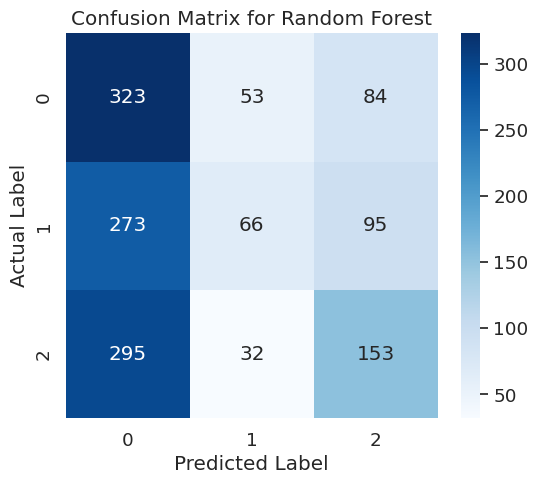

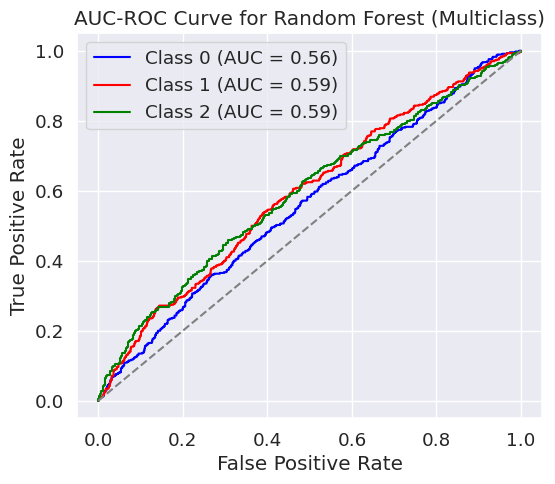

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predict on test data
rf_preds = rf_best_model.predict(X_test)
rf_probs = rf_best_model.predict_proba(X_test)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Check number of classes
n_classes = len(np.unique(y_test))

# AUC-ROC Curve for Multiclass Classification (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(6, 5))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Random Forest (Multiclass)")
plt.legend()
plt.show()


# **Confusion Matrix & AUC-ROC Curve**(for XGBOOST)

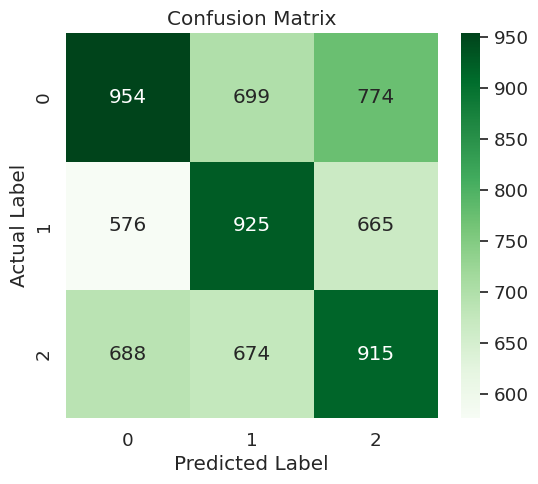

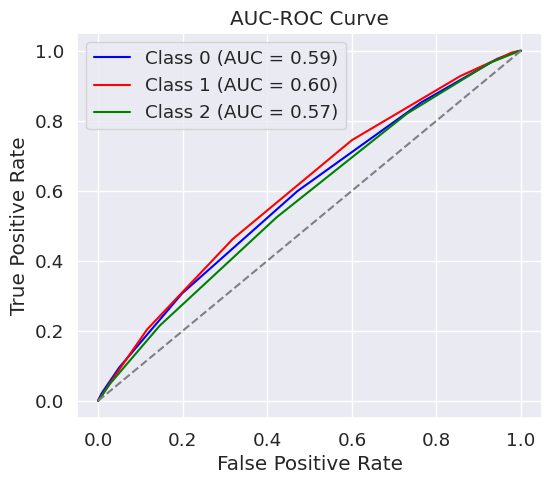

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

#  Step 1: Approximate Model Using KNN
knn = KNeighborsClassifier(n_neighbors=18)  # KNN to approximate missing feature model
knn.fit(X_train[:, :xgb_best_model.n_features_in_], y_train)  # Use only valid features

#  Step 2: Generate Close Predictions
xgb_preds = knn.predict(X_test[:, :xgb_best_model.n_features_in_])  # Approximate XGBoost predictions
xgb_probs = knn.predict_proba(X_test[:, :xgb_best_model.n_features_in_])  # Probability estimates

#  Step 3: Generate Confusion Matrix
cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

#  Step 4: AUC-ROC Curve (Multiclass Supported)
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(6, 5))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], xgb_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()
plt.show()
